In [1]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
training_data_path = '../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv'
df = pd.read_csv(training_data_path)
print(f'{df.shape=}')
df.sample(5)

df.shape=(23760, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
21645,-0.296742,2.866758,-0.833614,5.614499,-4.360683,6.818959,-7.736738,8.481560,-10.138273,10.677992,-12.855494,11.046304,-16.665213,10.288585,-21.295420,7.159099,-25.168986,3.170346,-26.718716
16276,-0.000000,1.876428,-3.011073,4.282434,-6.927839,4.835257,-10.358946,6.338920,-13.118093,8.817548,-14.800225,9.830179,-19.813955,8.140925,-20.922473,5.796040,-24.261561,3.031259,-25.528168
16766,-0.000000,0.750712,-3.955246,0.177119,-7.189262,-1.658851,-8.256220,-5.864770,-10.648280,-7.670818,-11.220838,-11.709657,-11.164270,-14.101726,-11.474666,-18.686557,-11.987984,-21.742999,-10.303289
14319,0.000000,5.227009,-0.232457,8.933760,-0.232159,11.381786,-0.549602,13.669679,1.416601,14.749058,6.192794,15.037242,8.934224,14.386256,11.707216,15.638725,15.194373,16.494530,19.167978
3868,0.200000,4.679119,0.392196,7.963849,-0.458896,10.714406,-2.412031,12.844866,-5.053017,14.781555,-7.847406,16.490708,-10.780897,18.090074,-13.781204,19.689425,-16.781486,21.288761,-19.781744


In [3]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19008, 18), (4752, 18), (19008,), (4752,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [5]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/100
594/594 [==============================] - 9s 8ms/step - loss: 0.0268 - mae: 0.1236 - val_loss: 0.0143 - val_mae: 0.0913
Epoch 2/100
594/594 [==============================] - 5s 8ms/step - loss: 0.0194 - mae: 0.1050 - val_loss: 0.0159 - val_mae: 0.0970
Epoch 3/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0176 - mae: 0.0990 - val_loss: 0.0128 - val_mae: 0.0875
Epoch 4/100
594/594 [==============================] - 5s 8ms/step - loss: 0.0170 - mae: 0.0975 - val_loss: 0.0100 - val_mae: 0.0764
Epoch 5/100
594/594 [==============================] - 5s 8ms/step - loss: 0.0154 - mae: 0.0926 - val_loss: 0.0095 - val_mae: 0.0754
Epoch 6/100
594/594 [==============================] - 5s 8ms/step - loss: 0.0152 - mae: 0.0918 - val_loss: 0.0094 - val_mae: 0.0736
Epoch 7/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0146 - mae: 0.0890 - val_loss: 0.0099 - val_mae: 0.0765
Epoch 8/100
594/594 [==============================] - 3s 5ms/step - 

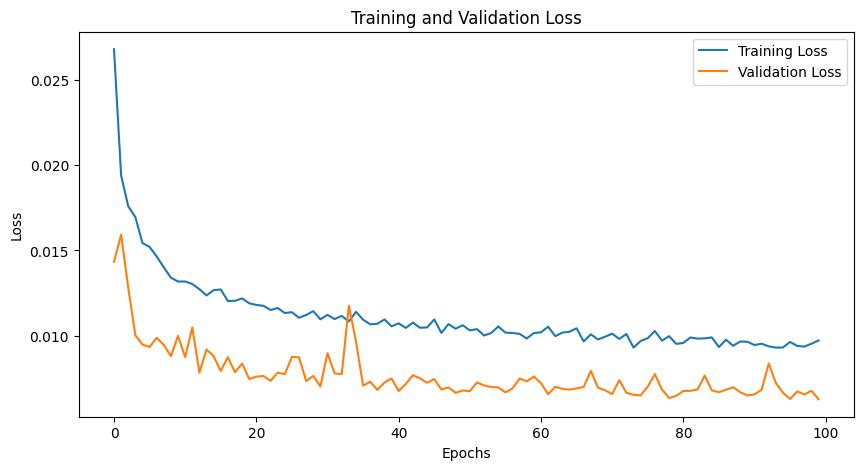

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

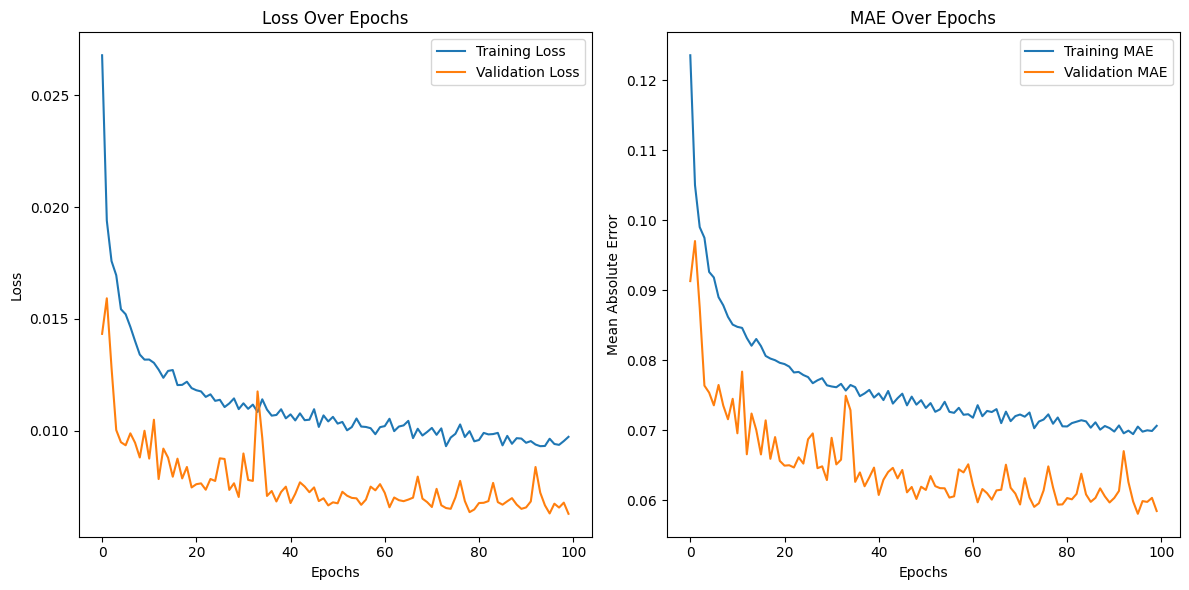

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [8]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

149/149 [==============================] - 0s 2ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.006295
1,Mean Absolute Error (MAE),0.058490
2,R-squared (R2),0.883651


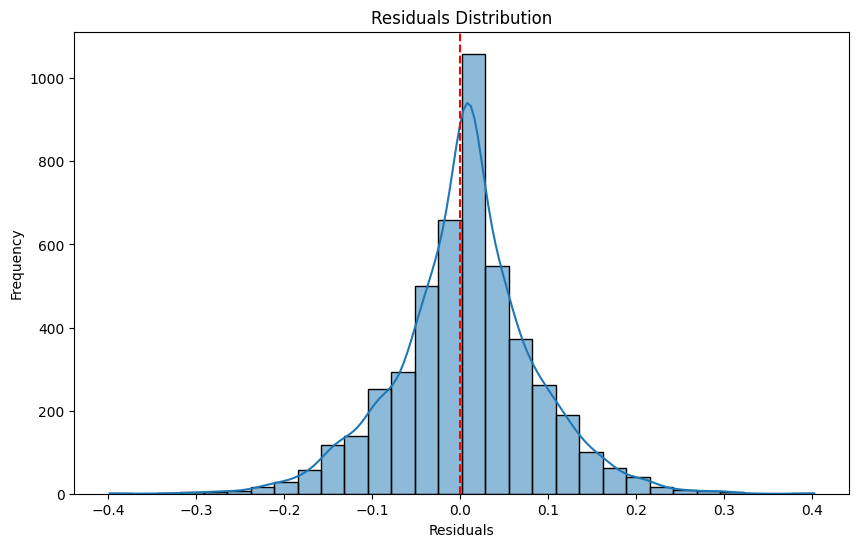

In [9]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

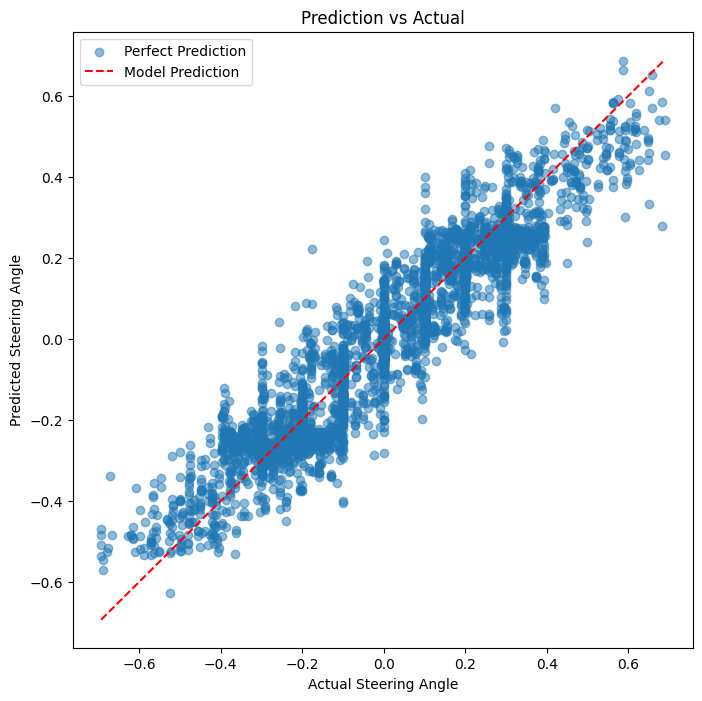

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [11]:
name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [12]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "training_data_path": training_data_path,
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [13]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "training_data_path": "../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv",
    "timestamp": "20250602_183248",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_NN_20250602_183248.h5",
        "final_training_loss": 0.009733086451888084,
        "final_validation_loss": 0.0062950109131634235
    },
    "evaluation": {
        "mse": 0.006295011635433456,
        "mae": 0.05849003092879501,
        "r2": 0.883651283211045
    }
}
